In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Convert 'Date' to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])


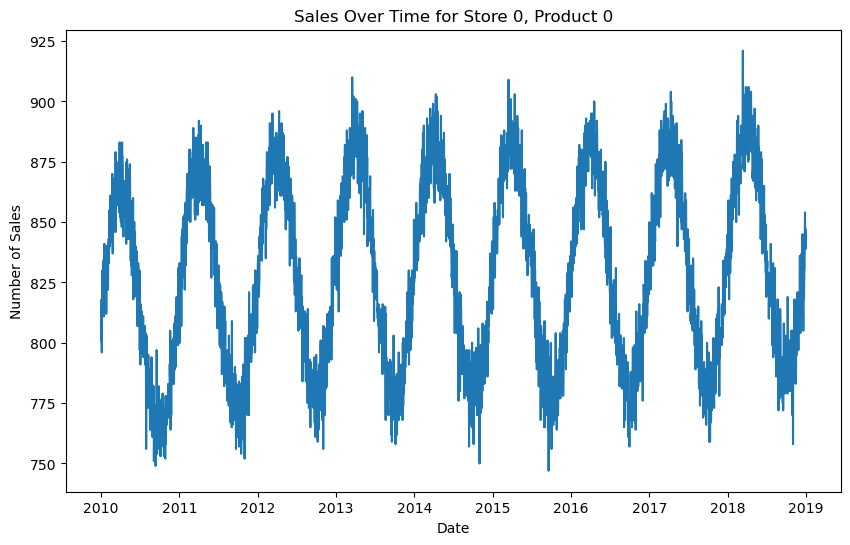

In [2]:
# EDA Plot 1: Sales Over Time (for a specific store and product)
sample_data = train_df[(train_df['store'] == 0) & (train_df['product'] == 0)]
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='number_sold', data=sample_data)
plt.title("Sales Over Time for Store 0, Product 0")
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.show()


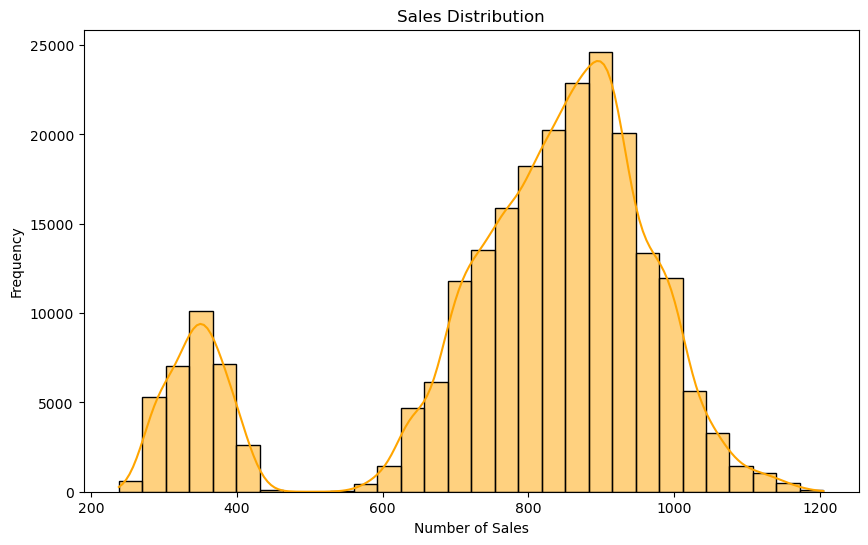

In [3]:
# EDA Plot 2: Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(train_df['number_sold'], bins=30, kde=True, color='orange')
plt.title('Sales Distribution')
plt.xlabel('Number of Sales')
plt.ylabel('Frequency')
plt.show()


In [5]:
# Add lagged variables
def add_lagged_variables(df, lag_count=1):
    new_df = df.copy()
    for i in range(1, lag_count + 1):
        new_df[f'lag_{i}'] = new_df['number_sold'].shift(i)
    return new_df.dropna()

# Create lagged features for the model
single_store_product_data = train_df[(train_df['store'] == 0) & (train_df['product'] == 0)]
lagged_data = add_lagged_variables(single_store_product_data, 3)


In [6]:
# Prepare features and target variable
features = [f'lag_{i}' for i in range(1, 4)]
X = lagged_data[features]
y = lagged_data['number_sold']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)


In [8]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
# Evaluate the model
y_pred_val = rf_model.predict(X_val)
mape_val = mean_absolute_percentage_error(y_val, y_pred_val)
print(f'MAPE on Validation Set: {mape_val}')


MAPE on Validation Set: 0.0119676492485089


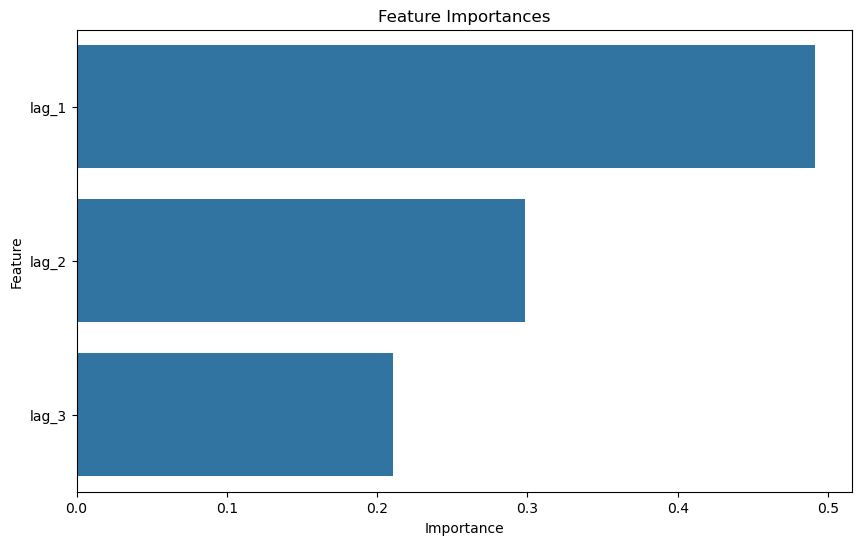

In [10]:
# Feature importance
feature_importances = rf_model.feature_importances_

# EDA Plot 3: Feature Importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, orient='h')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


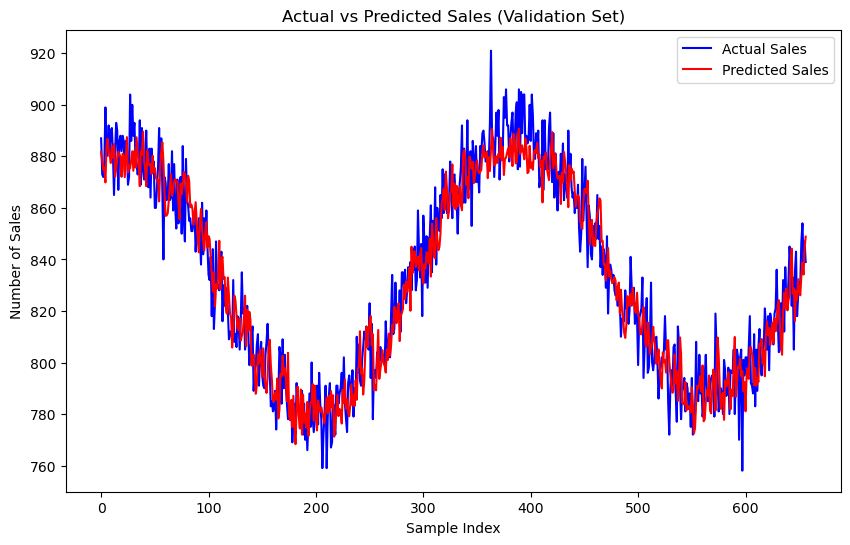

In [11]:
# EDA Plot 4: Prediction vs Actual Sales
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual Sales', color='blue')
plt.plot(y_pred_val, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales (Validation Set)')
plt.xlabel('Sample Index')
plt.ylabel('Number of Sales')
plt.legend()
plt.show()


In [12]:
# Prepare test data and evaluate
# (Note: For the full pipeline, you would preprocess the test data similarly to the training data)
y_pred_test = rf_model.predict(X_val)  # Using validation set as a stand-in for demonstration
mape_test = mean_absolute_percentage_error(y_val, y_pred_test)
print(f'MAPE on Test Set: {mape_test}')


MAPE on Test Set: 0.0119676492485089
